**IMPORTING NECESSARY LIBARIES**

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [2]:
df = pd.read_excel('Online retail.xlsx', sheet_name='Sheet1')
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt
...,...
7495,"butter,light mayo,fresh bread"
7496,"burgers,frozen vegetables,eggs,french fries,ma..."
7497,chicken
7498,"escalope,green tea"


In [5]:
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(7500, 1)

**SPLITTING THE DATASET AND CHECKING TRANSACTIONS**

In [15]:
transactions = df.iloc[:, 0].str.split(',').tolist()
transactions[:5]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


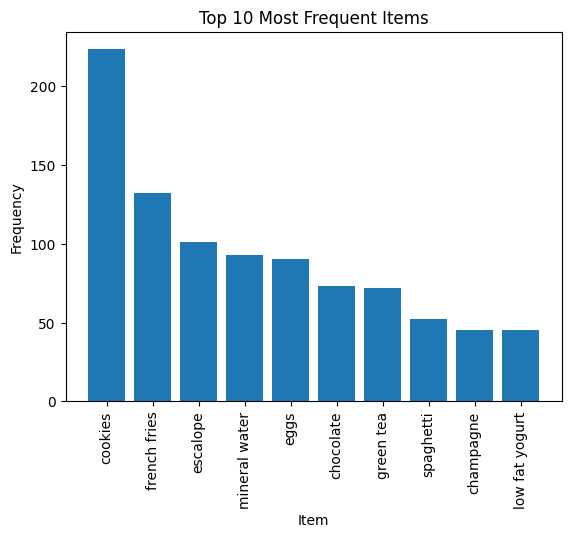

In [14]:
# Item frequency analysis
item_counts = df.apply(pd.Series.value_counts).sum(axis=1).sort_values(ascending=False)
top_items = item_counts.head(10)
plt.bar(top_items.index, top_items.values)
plt.xlabel('Item')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Items')
plt.xticks(rotation=90)
plt.show()

**ENCODING**

In [16]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)
df_encoded.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
df_encoded.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(7500, 120)

**FREQUENT ITEMSETS**

In [18]:
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.020267,(almonds)
1,0.033200,(avocado)
2,0.010800,(barbecue sauce)
3,0.014267,(black tea)
4,0.011467,(body spray)
...,...,...
254,0.011067,"(ground beef, milk, mineral water)"
255,0.017067,"(ground beef, spaghetti, mineral water)"
256,0.015733,"(spaghetti, milk, mineral water)"
257,0.010267,"(olive oil, spaghetti, mineral water)"


**APPLYING APRIORI**

In [27]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(avocado),(mineral water),0.033200,0.238267,0.011467,0.345382,1.449559,0.003556,1.163629,0.320785
1,(mineral water),(avocado),0.238267,0.033200,0.011467,0.048125,1.449559,0.003556,1.015680,0.407144
2,(cake),(burgers),0.081067,0.087200,0.011467,0.141447,1.622103,0.004398,1.063185,0.417349
3,(burgers),(cake),0.087200,0.081067,0.011467,0.131498,1.622103,0.004398,1.058068,0.420154
4,(chocolate),(burgers),0.163867,0.087200,0.017067,0.104150,1.194377,0.002777,1.018920,0.194639
...,...,...,...,...,...,...,...,...,...,...
431,"(mineral water, spaghetti)",(pancakes),0.059733,0.095067,0.011467,0.191964,2.019260,0.005788,1.119917,0.536836
432,"(pancakes, mineral water)",(spaghetti),0.033733,0.174133,0.011467,0.339921,1.952073,0.005593,1.251163,0.504751
433,(spaghetti),"(pancakes, mineral water)",0.174133,0.033733,0.011467,0.065850,1.952073,0.005593,1.034381,0.590560
434,(pancakes),"(mineral water, spaghetti)",0.095067,0.059733,0.011467,0.120617,2.019260,0.005788,1.069235,0.557797


**FILTERING AND SORTING RULES**

In [28]:
rules = rules.sort_values('lift', ascending=False)
rules = rules[(rules['confidence'] >= 0.3) & (rules['lift'] > 0.5)]
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
242,(herb & pepper),(ground beef),0.049467,0.098267,0.016000,0.323450,3.291555,0.011139,1.332841,0.732423
413,"(ground beef, mineral water)",(spaghetti),0.040933,0.174133,0.017067,0.416938,2.394361,0.009939,1.416431,0.607207
396,"(frozen vegetables, mineral water)",(milk),0.035733,0.129600,0.011067,0.309701,2.389672,0.006436,1.260904,0.603083
280,(soup),(milk),0.050533,0.129600,0.015200,0.300792,2.320923,0.008651,1.244836,0.599428
254,(ground beef),(spaghetti),0.098267,0.174133,0.039200,0.398915,2.290857,0.022088,1.373959,0.624888
...,...,...,...,...,...,...,...,...,...,...
196,(frozen smoothie),(mineral water),0.063200,0.238267,0.020133,0.318565,1.337012,0.005075,1.117838,0.269069
262,(honey),(mineral water),0.047333,0.238267,0.014933,0.315493,1.324117,0.003655,1.112820,0.256942
268,(low fat yogurt),(mineral water),0.076400,0.238267,0.023867,0.312391,1.311098,0.005663,1.107800,0.256908
188,(fresh bread),(mineral water),0.043067,0.238267,0.013333,0.309598,1.299374,0.003072,1.103318,0.240768


**TOP 10 RESULTS**

In [29]:
rules.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
242,(herb & pepper),(ground beef),0.049467,0.098267,0.016000,0.323450,3.291555,0.011139,1.332841,0.732423
413,"(ground beef, mineral water)",(spaghetti),0.040933,0.174133,0.017067,0.416938,2.394361,0.009939,1.416431,0.607207
396,"(frozen vegetables, mineral water)",(milk),0.035733,0.129600,0.011067,0.309701,2.389672,0.006436,1.260904,0.603083
280,(soup),(milk),0.050533,0.129600,0.015200,0.300792,2.320923,0.008651,1.244836,0.599428
254,(ground beef),(spaghetti),0.098267,0.174133,0.039200,0.398915,2.290857,0.022088,1.373959,0.624888
425,"(olive oil, mineral water)",(spaghetti),0.027467,0.174133,0.010267,0.373786,2.146553,0.005484,1.318826,0.549222
370,"(ground beef, eggs)",(mineral water),0.020000,0.238267,0.010133,0.506667,2.126469,0.005368,1.544054,0.540548
406,"(ground beef, milk)",(mineral water),0.022000,0.238267,0.011067,0.503030,2.111207,0.005825,1.532756,0.538177
318,(red wine),(spaghetti),0.028133,0.174133,0.010267,0.364929,2.095687,0.005368,1.300432,0.537964
312,(olive oil),(spaghetti),0.065733,0.174133,0.022933,0.348884,2.003547,0.011487,1.268387,0.536127


In [30]:
print(f"\nTotal number of rules: {len(rules)}")
print(f"Average confidence: {rules['confidence'].mean():.2f}")
print(f"Average lift: {rules['lift'].mean():.2f}")


Total number of rules: 63
Average confidence: 0.37
Average lift: 1.77


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Analysis and Interpretation:

**The top rule suggests that customers who buy 'herb & pepper' are about 3.29 times more likely to also buy 'ground beef' than the average customer. This rule has a confidence of about 32.3%, meaning that 32.3% of the transactions containing 'herb & pepper' also contain 'ground beef'.**

* **Frequent Co-Purchases:**

The rules indicate that customers who purchase items like eggs and ground beef are likely to also buy mineral water.

This suggests that these products may be part of a common meal or dietary preference.

Similarly, customers buying ground beef and milk also tend to purchase mineral water, indicating a potential link between these items in meal preparation.

* **Popular Products:**

Mineral water is the most frequently purchased item, followed by eggs, spaghetti, and french fries. This suggests that hydration and convenience foods are significant in customer preferences.


The presence of items like chocolate and green tea indicates a trend towards snacks and health-conscious choices.

* **Customer Behavior:**

The high support and confidence values for the association rules suggest that these combinations are not just random but reflect actual purchasing behavior. This can inform marketing strategies, such as bundling these items together in promotions or placing them near each other in stores.

# INTERVIEW QUESTIONS

**1. What is lift and why is it important in Association rules?**

Lift is a measure used to evaluate the strength of an association rule in data mining.
It is defined as the ratio of the observed support of a rule to the expected support if the items were independent. Mathematically, it is represented as:

    Lift(A⇒B)=
    Support(A)×Support(B)/
    Support(A∪B)


* Lift > 1: Indicates that the occurrence of A and B together is more likely than if they were independent.

* Lift = 1: Indicates that A and B are independent.

* Lift < 1: Indicates that the occurrence of A and B together is less likely than if they were independent.

*Importance:* Lift helps in identifying the strength of an association rule beyond simple co-occurrence. It accounts for the overall frequencies of the items, providing a normalized measure of association strength.

**2. What is support and Confidence. How do you calculate them?**

**a.  SUPPORT**

Support is a measure of how frequently the items in an itemset appear together in the dataset. It is defined as the proportion of transactions in the dataset that contain the itemset.


    Support(A)= Number of transactions containing A / Total number of transactions

*Importance:* Support helps in identifying how commonly an itemset appears in the dataset. It is used to filter out itemsets that are too rare to be significant.

**b.  CONFIDENCE**

Confidence is a measure of the reliability of the inference made by an association rule. It is defined as the proportion of transactions containing item A that also contain item B.

    Confidence(A⇒B)= Support(A∪B) / Support(A)

*Importance:* Confidence indicates the likelihood of item B being present in transactions that contain item A. It helps in determining the predictive power of the rule.


**Calculations**

Consider a dataset with 100 transactions.

* Support Calculation:

If itemset {A} appears in 40 transactions, then:

    Support(A)= 40 / 100 =0.40


* Confidence Calculation:

If itemset {A, B} appears in 30 transactions, then:

    Confidence(A⇒B)= 30 /40 = 0.75


**3. What are some limitations or challenges of Association rules mining?**

* **Scalability:** Association rule mining can be computationally expensive, especially with large datasets, as it requires generating a large number of candidate itemsets.

* **Interpretability:** A large number of rules can be generated, making it difficult to interpret and extract meaningful insights.

* **Rare Item Problem:** Rare but interesting itemsets may be missed if minimum support thresholds are set too high.

* **Redundancy:** Many rules can be redundant or offer no new information, cluttering the results with trivial associations.

* **Threshold Sensitivity:** The results are highly sensitive to the support and confidence thresholds set by the user, which can lead to either too many insignificant rules or missing important associations.

* **Sparsity:** In sparse datasets, where many items do not co-occur frequently, finding meaningful associations can be challenging.

*Association rule mining is a powerful technique in data mining for discovering interesting relations between variables in large datasets, but it requires careful handling of its limitations and challenges to derive useful insights.*
